<a href="https://colab.research.google.com/github/snvssk/data298A/blob/saidev/VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## https://www.youtube.com/watch?v=mRVTKrbRYi0

In [1]:
import tensorflow as tf
print(tf.__version__)

2.8.2


In [2]:
# import the libraries as shown below
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
#from keras.applications.vgg19 import VGG19
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator,load_img
from keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

## Collect data from Roboflow with size [224,224] for VGG

In [3]:
!pip install roboflow
from roboflow import Roboflow
rf = Roboflow(api_key="gZ889YZoIUvo6Bvc6lsU")
project = rf.workspace("sjsu").project("building-image")
dataset = project.version(10).download("coco")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 145 kB 18.7 MB/s 
     |████████████████████████████████| 178 kB 40.2 MB/s 
     |████████████████████████████████| 1.1 MB 9.6 MB/s 
     |████████████████████████████████| 67 kB 5.9 MB/s 
     |████████████████████████████████| 54 kB 1.8 MB/s 
     |████████████████████████████████| 138 kB 46.5 MB/s 
     |████████████████████████████████| 596 kB 41.7 MB/s 
     |████████████████████████████████| 62 kB 947 kB/s 
  Created wheel for roboflow: filename=roboflow-0.2.4-py3-none-any.whl size=21356 sha256=47c76ae5b2fc932027b7422210edeb5b834943fd17c71e0321c7a51335741ffd
  Stored in directory: /root/.cache/pip/wheels/b7/2c/60/3733c0e323b1d7aec00f852264314bf6c48192c8e1dc92b3ee
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=799882d6ff46b5ea7f93dbea8423fdf10f6f634d02724835d55148ea3e2b42b8
  Stored in directory: /root/.cache/pip/

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Building-Image-10 in coco:: 100%|██████████| 242/242 [00:00<00:00, 1021.95it/s]


## When data collected it stored as individual jpg image so creating 14 folders as I have total 14 class labels and putting corresponding image file to its class labels for train dataset.

In [4]:
import json
json_path= '/content/Building-Image-10/train/_annotations.coco.json'
file = open(json_path)
json_data= json.load(file)
print(json_data)
categories = (json_data['categories'])
annotations= (json_data['annotations'])
image_paths = json_data['images']

{'info': {'year': '2022', 'version': '10', 'description': 'Exported from roboflow.ai', 'contributor': '', 'url': 'https://public.roboflow.ai/object-detection/undefined', 'date_created': '2022-06-27T22:35:27+00:00'}, 'licenses': [{'id': 1, 'url': 'https://creativecommons.org/publicdomain/zero/1.0/', 'name': 'Public Domain'}], 'categories': [{'id': 0, 'name': 'Building-Roof', 'supercategory': 'none'}, {'id': 1, 'name': 'Building-Roof', 'supercategory': 'Building-Roof'}, {'id': 2, 'name': 'Commercial-Flat-Roof', 'supercategory': 'Building-Roof'}, {'id': 3, 'name': 'Commercial-Slope-Roof', 'supercategory': 'Building-Roof'}, {'id': 4, 'name': 'Construction-Area', 'supercategory': 'Building-Roof'}, {'id': 5, 'name': 'Flat Roof', 'supercategory': 'Building-Roof'}, {'id': 6, 'name': 'Land', 'supercategory': 'Building-Roof'}, {'id': 7, 'name': 'Playground', 'supercategory': 'Building-Roof'}, {'id': 8, 'name': 'Slope-Flat-Roof', 'supercategory': 'Building-Roof'}, {'id': 9, 'name': 'Slope-Roof', 

In [5]:
image_id_map = {}
for image_path in image_paths:
  #print(image_path)
  image_id_map[image_path['id']] = image_path['file_name']
print(image_id_map)

{0: 'Screen-Shot-2022-06-23-at-11-52-39-AM_png.rf.05368b75ec781dadd984b8f78799504b.jpg', 1: 'Screen-Shot-2022-06-22-at-7-02-40-PM_png.rf.0c48a240da8c407c67aa1296d18de3a0.jpg', 2: 'MountainView_22_png.rf.072a4382d3767a659cfa6c53f29c8f1d.jpg', 3: 'Screen-Shot-2022-06-22-at-9-27-18-PM_png.rf.0b923fc45787cab6da70a7d800ba6214.jpg', 4: 'MountainView_23_png.rf.037b878240411b406b294bfce6ca80b3.jpg', 5: 'Screen-Shot-2022-06-23-at-6-12-53-PM_png.rf.1ca9a89a8718d8da5e659fb940472ce2.jpg', 6: 'Screen-Shot-2022-06-23-at-6-18-26-PM_png.rf.0ef1b93ee8c6e8971439635c7591be91.jpg', 7: 'Screen-Shot-2022-06-22-at-6-57-59-PM_png.rf.1d208a4d7fc500d403a2a6cfad78950b.jpg', 8: 'Screen-Shot-2022-06-23-at-6-09-42-PM_png.rf.106e87941b60a479a367ea109311dfa3.jpg', 9: 'Screen-Shot-2022-06-23-at-6-14-36-PM_png.rf.1a7e989508c53d05213cb6e18992091f.jpg', 10: 'MountainView_48_png.rf.220b0c8006af0e8fab7878b6ad5d9587.jpg', 11: 'Screen-Shot-2022-06-22-at-9-20-43-PM_png.rf.1e451a4a1190b59098a0c8fbaf41a15e.jpg', 12: 'Screen-Sho

In [6]:
print(categories)

[{'id': 0, 'name': 'Building-Roof', 'supercategory': 'none'}, {'id': 1, 'name': 'Building-Roof', 'supercategory': 'Building-Roof'}, {'id': 2, 'name': 'Commercial-Flat-Roof', 'supercategory': 'Building-Roof'}, {'id': 3, 'name': 'Commercial-Slope-Roof', 'supercategory': 'Building-Roof'}, {'id': 4, 'name': 'Construction-Area', 'supercategory': 'Building-Roof'}, {'id': 5, 'name': 'Flat Roof', 'supercategory': 'Building-Roof'}, {'id': 6, 'name': 'Land', 'supercategory': 'Building-Roof'}, {'id': 7, 'name': 'Playground', 'supercategory': 'Building-Roof'}, {'id': 8, 'name': 'Slope-Flat-Roof', 'supercategory': 'Building-Roof'}, {'id': 9, 'name': 'Slope-Roof', 'supercategory': 'Building-Roof'}, {'id': 10, 'name': 'Solar-Flat-Roof', 'supercategory': 'Building-Roof'}, {'id': 11, 'name': 'Solar-Pannel-Ground', 'supercategory': 'Building-Roof'}, {'id': 12, 'name': 'Solar-Slope-Roof', 'supercategory': 'Building-Roof'}, {'id': 13, 'name': 'TreeShading-Slope-Roof', 'supercategory': 'Building-Roof'}, {'

In [7]:
import os
base_train_path = '/content/Building-Image-10/train/'
category_map = {}
for category in categories:
  if category['supercategory']!= 'none':
    print(category)
    #os.mkdir(base_train_path + category['name'])
    category_map[category['id']] = category['name'] 

category_map

{'id': 1, 'name': 'Building-Roof', 'supercategory': 'Building-Roof'}
{'id': 2, 'name': 'Commercial-Flat-Roof', 'supercategory': 'Building-Roof'}
{'id': 3, 'name': 'Commercial-Slope-Roof', 'supercategory': 'Building-Roof'}
{'id': 4, 'name': 'Construction-Area', 'supercategory': 'Building-Roof'}
{'id': 5, 'name': 'Flat Roof', 'supercategory': 'Building-Roof'}
{'id': 6, 'name': 'Land', 'supercategory': 'Building-Roof'}
{'id': 7, 'name': 'Playground', 'supercategory': 'Building-Roof'}
{'id': 8, 'name': 'Slope-Flat-Roof', 'supercategory': 'Building-Roof'}
{'id': 9, 'name': 'Slope-Roof', 'supercategory': 'Building-Roof'}
{'id': 10, 'name': 'Solar-Flat-Roof', 'supercategory': 'Building-Roof'}
{'id': 11, 'name': 'Solar-Pannel-Ground', 'supercategory': 'Building-Roof'}
{'id': 12, 'name': 'Solar-Slope-Roof', 'supercategory': 'Building-Roof'}
{'id': 13, 'name': 'TreeShading-Slope-Roof', 'supercategory': 'Building-Roof'}
{'id': 14, 'name': 'Unknownshape-Roof', 'supercategory': 'Building-Roof'}


{1: 'Building-Roof',
 2: 'Commercial-Flat-Roof',
 3: 'Commercial-Slope-Roof',
 4: 'Construction-Area',
 5: 'Flat Roof',
 6: 'Land',
 7: 'Playground',
 8: 'Slope-Flat-Roof',
 9: 'Slope-Roof',
 10: 'Solar-Flat-Roof',
 11: 'Solar-Pannel-Ground',
 12: 'Solar-Slope-Roof',
 13: 'TreeShading-Slope-Roof',
 14: 'Unknownshape-Roof'}

In [8]:
for images in annotations:
  print(images)
  source_path = base_train_path + image_id_map[images['id']]
  destination_path = base_train_path + category_map[images['category_id']]+"/" + image_id_map[images['id']]
  #print(source_path)
  #print(destination_path)
  os.rename(source_path, destination_path)   

{'id': 0, 'image_id': 0, 'category_id': 12, 'bbox': [62, 35, 155.529279, 130.82732399999998], 'area': 20347.47937521939, 'segmentation': [[189.029985, 35.326522, 62.078588, 72.077324, 96.71995, 166.153846, 217.607867, 130.350561, 189.029985, 35.326522]], 'iscrowd': 0}
{'id': 1, 'image_id': 1, 'category_id': 9, 'bbox': [45, 28, 158.167797, 187.130496], 'area': 29598.01830383731, 'segmentation': [[71.803746, 215.339106, 122.483535, 205.149029, 146.687738, 204.070758, 165.809494, 200.980173, 203.524235, 198.394867, 171.476298, 28.20861, 97.515932, 37.761632, 100.683005, 62.252134, 45.356438, 68.085988, 71.803746, 215.339106]], 'iscrowd': 0}
{'id': 2, 'image_id': 2, 'category_id': 9, 'bbox': [30, 0, 138.66150499999998, 190.458699], 'area': 26409.28984368199, 'segmentation': [[135.335136, 0.679909, 119.451492, 7.030568, 118.597732, 5.044867, 93.734861, 14.318949, 96.939651, 35.602539, 29.726275, 59.806843, 38.984516, 112.958745, 60.095098, 103.740474, 77.202544, 190.505307, 146.352624, 160.

In [9]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/Building-Image-10/train'
valid_path = '/content/Building-Image-10/test'


In [10]:
# Import the VGG16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58900480/58889256 [==============================] - 0s 0us/step


In [11]:
# don't train existing weights
for layer in vgg16.layers:
    layer.trainable = False

In [12]:
# our layers - you can add more if you want
x = Flatten()(vgg16.output)

In [19]:
#prediction = Dense(len(folders), activation='softmax')(x)
prediction = Dense(14, activation='softmax')(x)

# create a model object
model = Model(inputs=vgg16.input, outputs=prediction)

In [127]:
# view the structure of the model
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [16]:
"""# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)"""

In [17]:
# Use the Image Data Generator to import the images from the dataset
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [20]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/Building-Image-10/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 161 images belonging to 14 classes.


### Creating folders for test data set and putting coresponding image to its class labels.

In [21]:
import json
json_path_test= '/content/Building-Image-10/test/_annotations.coco.json'
file = open(json_path_test)

json_data_test= json.load(file)
print(json_data_test)
categories_test = (json_data_test['categories'])
annotations_test= (json_data_test['annotations'])
image_paths_test = json_data_test['images']

{'info': {'year': '2022', 'version': '10', 'description': 'Exported from roboflow.ai', 'contributor': '', 'url': 'https://public.roboflow.ai/object-detection/undefined', 'date_created': '2022-06-27T22:35:27+00:00'}, 'licenses': [{'id': 1, 'url': 'https://creativecommons.org/publicdomain/zero/1.0/', 'name': 'Public Domain'}], 'categories': [{'id': 0, 'name': 'Building-Roof', 'supercategory': 'none'}, {'id': 1, 'name': 'Building-Roof', 'supercategory': 'Building-Roof'}, {'id': 2, 'name': 'Commercial-Flat-Roof', 'supercategory': 'Building-Roof'}, {'id': 3, 'name': 'Commercial-Slope-Roof', 'supercategory': 'Building-Roof'}, {'id': 4, 'name': 'Construction-Area', 'supercategory': 'Building-Roof'}, {'id': 5, 'name': 'Flat Roof', 'supercategory': 'Building-Roof'}, {'id': 6, 'name': 'Land', 'supercategory': 'Building-Roof'}, {'id': 7, 'name': 'Playground', 'supercategory': 'Building-Roof'}, {'id': 8, 'name': 'Slope-Flat-Roof', 'supercategory': 'Building-Roof'}, {'id': 9, 'name': 'Slope-Roof', 

In [22]:
image_id_map_test = {}
for image_path in image_paths_test:
  #print(image_path)
  image_id_map_test[image_path['id']] = image_path['file_name']

print(image_id_map_test)

{0: 'Screen-Shot-2022-06-22-at-6-58-15-PM_png.rf.5677b6f1505b1ffebcecc28e9f259527.jpg', 1: 'Screen-Shot-2022-06-22-at-6-54-35-PM_png.rf.1b36d3d94924be0f008ea3f979cec98c.jpg', 2: 'Screen-Shot-2022-06-22-at-9-20-30-PM_png.rf.08118c81d188dce2451dd397f50987d0.jpg', 3: 'Screen-Shot-2022-06-22-at-10-30-34-PM_png.rf.33a99ea995354db7df1af2d4c631cd98.jpg', 4: 'Screen-Shot-2022-06-22-at-9-26-24-PM_png.rf.140686464eccb60fa28fd8ee472d13db.jpg', 5: 'Screen-Shot-2022-06-23-at-6-16-44-PM_png.rf.342ee34eed22a439408d410f6007cb68.jpg', 6: 'Screen-Shot-2022-06-22-at-7-01-04-PM_png.rf.16cbd3d9ddcec8817cc8667a3785db6a.jpg', 7: 'Screen-Shot-2022-06-22-at-6-59-34-PM_png.rf.4202cb2815e2ddf12fac462d9d28c4d5.jpg', 8: 'Screen-Shot-2022-06-22-at-10-31-07-PM_png.rf.12afd9d62f2dbc461265f420edc001fe.jpg', 9: 'Screen-Shot-2022-06-22-at-7-00-09-PM_png.rf.1e146546b31eb0afa018a0c8c4c92065.jpg', 10: 'Screen-Shot-2022-06-22-at-7-02-45-PM_png.rf.2cf297dac523994726881308df4916a6.jpg', 11: 'Screen-Shot-2022-06-22-at-9-32-19-

In [23]:
print(categories_test)

[{'id': 0, 'name': 'Building-Roof', 'supercategory': 'none'}, {'id': 1, 'name': 'Building-Roof', 'supercategory': 'Building-Roof'}, {'id': 2, 'name': 'Commercial-Flat-Roof', 'supercategory': 'Building-Roof'}, {'id': 3, 'name': 'Commercial-Slope-Roof', 'supercategory': 'Building-Roof'}, {'id': 4, 'name': 'Construction-Area', 'supercategory': 'Building-Roof'}, {'id': 5, 'name': 'Flat Roof', 'supercategory': 'Building-Roof'}, {'id': 6, 'name': 'Land', 'supercategory': 'Building-Roof'}, {'id': 7, 'name': 'Playground', 'supercategory': 'Building-Roof'}, {'id': 8, 'name': 'Slope-Flat-Roof', 'supercategory': 'Building-Roof'}, {'id': 9, 'name': 'Slope-Roof', 'supercategory': 'Building-Roof'}, {'id': 10, 'name': 'Solar-Flat-Roof', 'supercategory': 'Building-Roof'}, {'id': 11, 'name': 'Solar-Pannel-Ground', 'supercategory': 'Building-Roof'}, {'id': 12, 'name': 'Solar-Slope-Roof', 'supercategory': 'Building-Roof'}, {'id': 13, 'name': 'TreeShading-Slope-Roof', 'supercategory': 'Building-Roof'}, {'

In [24]:
import os
base_train_path_test = '/content/Building-Image-10/test/'
category_map_test = {}
for category in categories:
  if category['supercategory']!= 'none':
    print(category)
    #os.mkdir(base_train_path_test + category['name'])
    category_map_test[category['id']] = category['name'] 

category_map_test

{'id': 1, 'name': 'Building-Roof', 'supercategory': 'Building-Roof'}
{'id': 2, 'name': 'Commercial-Flat-Roof', 'supercategory': 'Building-Roof'}
{'id': 3, 'name': 'Commercial-Slope-Roof', 'supercategory': 'Building-Roof'}
{'id': 4, 'name': 'Construction-Area', 'supercategory': 'Building-Roof'}
{'id': 5, 'name': 'Flat Roof', 'supercategory': 'Building-Roof'}
{'id': 6, 'name': 'Land', 'supercategory': 'Building-Roof'}
{'id': 7, 'name': 'Playground', 'supercategory': 'Building-Roof'}
{'id': 8, 'name': 'Slope-Flat-Roof', 'supercategory': 'Building-Roof'}
{'id': 9, 'name': 'Slope-Roof', 'supercategory': 'Building-Roof'}
{'id': 10, 'name': 'Solar-Flat-Roof', 'supercategory': 'Building-Roof'}
{'id': 11, 'name': 'Solar-Pannel-Ground', 'supercategory': 'Building-Roof'}
{'id': 12, 'name': 'Solar-Slope-Roof', 'supercategory': 'Building-Roof'}
{'id': 13, 'name': 'TreeShading-Slope-Roof', 'supercategory': 'Building-Roof'}
{'id': 14, 'name': 'Unknownshape-Roof', 'supercategory': 'Building-Roof'}


{1: 'Building-Roof',
 2: 'Commercial-Flat-Roof',
 3: 'Commercial-Slope-Roof',
 4: 'Construction-Area',
 5: 'Flat Roof',
 6: 'Land',
 7: 'Playground',
 8: 'Slope-Flat-Roof',
 9: 'Slope-Roof',
 10: 'Solar-Flat-Roof',
 11: 'Solar-Pannel-Ground',
 12: 'Solar-Slope-Roof',
 13: 'TreeShading-Slope-Roof',
 14: 'Unknownshape-Roof'}

In [25]:
for images in annotations_test:
  print(images)
  source_path_test = base_train_path_test + image_id_map_test[images['id']]
  destination_path_test = base_train_path_test + category_map_test[images['category_id']]+"/" + image_id_map_test[images['id']]
  print(source_path_test)
  print(destination_path_test)
  os.rename(source_path_test, destination_path_test)  

{'id': 0, 'image_id': 0, 'category_id': 8, 'bbox': [46, 1, 155.592355, 211.46094599999998], 'area': 32901.70657866783, 'segmentation': [[189.823287, 1.192371, 105.67054, 7.152713, 76.984283, 15.367235, 46.381974, 20.59814, 48.700991, 51.627712, 49.942484, 83.994247, 52.85222, 121.565155, 46.082235, 123.54604, 48.597747, 165.614491, 52.546235, 212.653317, 90.490476, 205.340269, 123.831057, 192.158314, 153.532266, 186.471256, 201.67459, 176.210898, 196.796645, 111.188867, 193.600911, 48.80433, 189.823287, 1.192371]], 'iscrowd': 0}
/content/Building-Image-10/test/Screen-Shot-2022-06-22-at-6-58-15-PM_png.rf.5677b6f1505b1ffebcecc28e9f259527.jpg
/content/Building-Image-10/test/Slope-Flat-Roof/Screen-Shot-2022-06-22-at-6-58-15-PM_png.rf.5677b6f1505b1ffebcecc28e9f259527.jpg
{'id': 1, 'image_id': 1, 'category_id': 8, 'bbox': [52, 12, 138.919227, 197.432477], 'area': 27427.16708953528, 'segmentation': [[52.105045, 51.104767, 54.312083, 63.163349, 55.924586, 78.277669, 64.095338, 77.269141, 67.92

In [26]:
test_set = test_datagen.flow_from_directory('/content/Building-Image-10/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 72 images belonging to 14 classes.


In [28]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [37]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=30, #Initially keep 2 epoc size as it takes long to train
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/30
6/6 [==============================] - 104s 18s/step - loss: 1.2760 - accuracy: 0.6460 - val_loss: 4.9337 - val_accuracy: 0.4306
Epoch 2/30
6/6 [==============================] - 104s 18s/step - loss: 1.0241 - accuracy: 0.6770 - val_loss: 4.8941 - val_accuracy: 0.4306
Epoch 3/30
6/6 [==============================] - 104s 18s/step - loss: 0.9446 - accuracy: 0.7205 - val_loss: 4.9879 - val_accuracy: 0.4028
Epoch 4/30
6/6 [==============================] - 105s 18s/step - loss: 0.5517 - accuracy: 0.8261 - val_loss: 5.8664 - val_accuracy: 0.4444
Epoch 5/30
6/6 [==============================] - 104s 18s/step - loss: 0.9119 - accuracy: 0.6398 - val_loss: 5.9709 - val_accuracy: 0.2639
Epoch 6/30
6/6 [==============================] - 105s 21s/step - loss: 0.7948 - accuracy: 0.6398 - val_loss: 6.1709 - val_accuracy: 0.4167
Epoch 7/30
6/6 [==============================] - 104s 18s/step - loss: 0.7801 - accuracy: 0.7267 - val_loss: 4.7495 - val_accuracy: 0.3889
Epoch 8/30
6/6 [====

### When we mention validation_split as fit parameter while fitting DL model, it splits data into two parts for every epoch i.e. training data and validation data. It trains the model on training data and validate the model on validation data by checking its loss and accuracy.

### Usually with every epoch increasing, loss goes lower and accuracy goes higher. But with val_loss and val_acc, many cases can be possible:

### val_loss starts increasing, val_acc starts decreasing(means model is cramming values not learning)

### val_loss starts increasing, val_acc also increases.(could be case of overfitting or diverse probability values in cases softmax is used in output layer)

### val_loss starts decreasing, val_acc starts increasing(Correct, means model build is learning and working fine)

In [38]:
import matplotlib.pyplot as plt

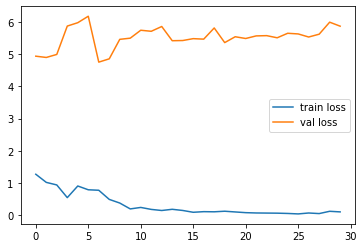

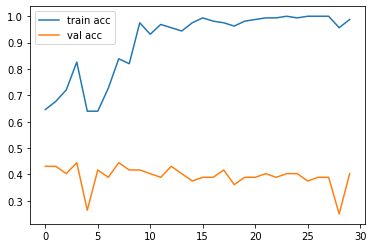

<Figure size 432x288 with 0 Axes>

In [39]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [40]:
# save it as a h5 file
from keras.models import load_model
model.save('model_vgg16.h5')

## After training test the model to get y_hat

In [41]:
y_pred = model.predict(test_set)

In [42]:
y_pred

array([[8.05376545e-15, 2.41374465e-07, 5.03862623e-07, ...,
        6.14487007e-03, 1.28628735e-05, 2.00670984e-05],
       [7.42809567e-16, 4.47478410e-09, 3.46223383e-09, ...,
        2.60660541e-03, 9.51082620e-06, 1.03767029e-07],
       [2.71441991e-14, 5.89308627e-07, 2.52621106e-07, ...,
        1.63104236e-02, 5.62988175e-03, 3.60514491e-07],
       ...,
       [2.56539299e-12, 2.48826636e-05, 4.61393618e-04, ...,
        4.27446701e-02, 2.98263552e-03, 8.44606166e-06],
       [4.48334200e-14, 3.53911091e-05, 1.52981397e-06, ...,
        2.17811279e-02, 1.32420962e-03, 6.90814772e-07],
       [2.23515020e-14, 1.62522949e-04, 3.89087982e-05, ...,
        2.69631922e-01, 6.02739310e-05, 1.84091576e-07]], dtype=float32)

In [43]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

## Total 72 image we had in test set 


In [128]:
y_pred

array([ 8,  8,  8,  8, 11,  8,  8,  8,  8,  8,  8, 11,  8, 11,  8,  8, 11,
        8,  8,  8,  8,  8, 11,  8, 11, 11,  8,  8,  8,  8,  8,  8, 11, 11,
        8,  8,  8,  8,  8,  8,  8,  8,  8, 11,  8,  8, 11, 11,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8, 11,  8,  8,  8,  8,  8,  8,  8, 11,  8,
        8,  8,  8,  8])

In [86]:
from keras.models import load_model
from keras.preprocessing import image

In [87]:
model=load_model('/content/model_vgg16.h5')

In [88]:
from keras.applications.vgg16 import preprocess_input
#img_data

## Passing image from user to classify roof


In [89]:
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions

Input image shape: (1, 224, 224, 3)


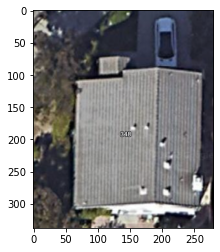

In [125]:
img_path = '/content/Building-Image-10/user_test/Screen Shot 2022-06-22 at 7.00.43 PM.png'
img=image.load_img(img_path,target_size=(224,224))
X = image.img_to_array(img)
X = np.expand_dims(X, axis=0)
X=preprocess_input(X)
print('Input image shape:', X.shape)
my_image= imread(img_path)
imshow(my_image)

In [126]:
a=(model.predict(X))
#print(a)
a=np.argmax(model.predict(X), axis=1)
print(a)

[8]


In [108]:
def fun(i):
  for i in range (14):
    if i == 0:
      print("Building-Roof")
    if i == 1:
      print("Commercial-Flat-Roof")
    if i == 2:
      print("Commercial-Slope-Roof")
    if i == 3:
      print("Construction-Area")
    if i == 4:
      print("Flat-Roof")
    if i == 5:
      print("Land")
    if i == 6:
      print("Playground")
    if i == 7:
      print("Slope-Flat-Roof")
    if i == 8:
      print("Slope-Roof")
    if i == 9:
      print("Solar-Flat-Roof")
    if i == 10:
      print("Solar-Pannel-Ground")
    if i == 11:
      print("Solar-Slope-Roof")
    if i == 12:
      print("Tree-Shading-Roof")
    else:
      print("Unknown-shape-Roof")

Input image shape: (1, 224, 224, 3)


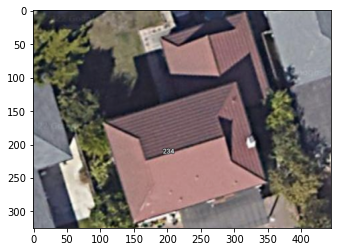

In [118]:
img_path = '/content/Building-Image-10/user_test/Screen Shot 2022-06-22 at 7.02.33 PM.png'
img=image.load_img(img_path,target_size=(224,224))
X = image.img_to_array(img)
X = np.expand_dims(X, axis=0)
X=preprocess_input(X)
print('Input image shape:', X.shape)
my_image= imread(img_path)
imshow(my_image)

In [119]:
a=(model.predict(X))
#print(a)
a=np.argmax(model.predict(X), axis=1)
print(a)

[8]


## Other: https://www.youtube.com/watch?v=mjk4vDYOwq0